In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [64]:
'''
A dataset of covid cases around the world are loaded.  
'''
df=pd.read_csv('owid-covid-data.csv', parse_dates=['date'])


C:\Users\mano_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.



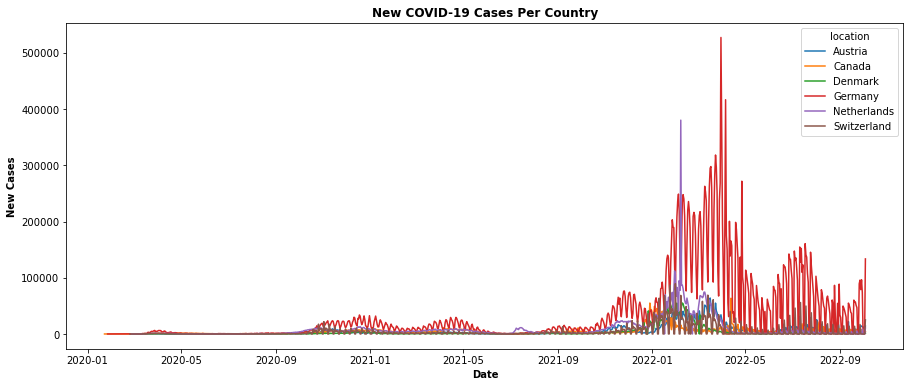

In [65]:
'''
Filtering was done to show the amount of new cases overall for 6
chosen countries.  Seaborn package was used for visualizing cases over time as a lineplot.  
'''
country_list = ['Austria', 'Denmark', 'Switzerland', 'Canada', 'Germany', 'Netherlands'] #List of chosen countries

filt_df2=df[df['location'].isin(country_list)] #filtering by country from chosen list
plt.figure(figsize=(15, 6))
sns.lineplot(data=filt_df2, x="date", y="new_cases", hue="location") #color coded by location of chosen countries
plt.ylabel('New Cases', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.title('New COVID-19 Cases Per Country', fontweight='bold')
plt.show()

In [66]:
'''
A world map is plotted for 2 different dates comparing cases from a day in last September to cases in a day in 2020, using 
the plotly package.
First the original dataframe needed to be filtered for this.  Under the location column, there were values such as Asia 
and Europe which do not technically count as countries, so they were removed.  Their isocodes started with OWID.
'''
df = df[~df.iso_code.str.contains('|'.join(["OWID"]))] #removing rows with isocodes starting with OWID since their location values don't count as countries.

#dates chosen.
sep22_date_df = df.loc[df['date']=='9/4/2022']
apr20_date_df = df.loc[df['date']=='4/15/2020']

In [67]:
#9/4/2022 covid cases on world map
fig = px.choropleth(sep22_date_df, locations="location", #locations argument value corresponds to location column
                    locationmode = "country names",
                    color="new_cases", #color coded by number of new cases from new_cases column
                    hover_name="location", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


In [68]:
#4/15/2020 covid cases on world map
fig = px.choropleth(apr20_date_df, locations="location",
                    locationmode = "country names",
                    color="new_cases", # lifeExp is a column of gapminder
                    hover_name="location", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()